# import function

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import importlib

from model.dpc import DPC
from model.blc import BLC
from model.aaf import AAF
from model.awb import WBGC
from model.cnf import CNF
from model.cfa import CFA
from model.gac import GC
from model.ccm import CCM
from model.csc import CSC
from model.bnf import BNF
from model.eeh import EE
from model.fcs import FCS
from model.bcc import BCC
from model.hsc import HSC
from model.nlm import NLM

# Setting

In [16]:
# initialization
raw_h = 1280
raw_w = 720
dpc_thres = 30
dpc_mode = 'gradient'
dpc_clip = 1023
bl_r = 0
bl_gr = 0
bl_gb = 0
bl_b = 0
alpha = 0
beta = 0
blc_clip = 1023
bayer_pattern = 'rggb'
r_gain = 1.5
gr_gain = 1.0
gb_gain = 1.0
b_gain = 1.1
awb_clip = 1023
cfa_mode = 'malvar'
cfa_clip = 1023
ccm = np.zeros((3, 4))
csc = np.zeros((3, 3))
csc_offset = np.zeros(3)
bnf_dw = np.zeros((5,5))
bnf_rw = [1, 1, 1, 1]
bnf_rthres = [32, 64, 128]
bnf_clip = 255
edge_filter = np.zeros((3, 5))
ee_gain = [32, 128]
ee_thres = [32, 64]
ee_emclip = [-64, 64]
fcs_edge = [32, 64]
fcs_gain = 32
fcs_intercept = 2
fcs_slope = 3
hue = 128
saturation = 256
hsc_clip = 255
brightness = 10  # [-255, 255]
contrast = 10 / pow(2, 5)  # [-32,128]
bcc_clip = 255
nlm_h = 10
nlm_clip = 255

In [17]:
raw_path = './raw/test.RAW'

In [18]:
config_path = './config/config.csv'

f = open(config_path, 'r', encoding='utf-8-sig')
with f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        parameter = row[0]
        value = row[1]
        description = row[2]
        # print(parameter, value, description)
        if 'raw' in str(parameter):
            raw_w = int(value) if '_w' in str(parameter) else raw_w
            raw_h = int(value) if '_h' in str(parameter) else raw_h
        elif 'dpc' in str(parameter):
            dpc_thres = int(value) if '_thres' in str(parameter) else dpc_thres
            dpc_mode  = str(value) if '_mode' in str(parameter) else dpc_mode
            dpc_clip  = int(value) if '_clip' in str(parameter) else dpc_clip
        elif 'bl' in str(parameter):
            bl_r  = int(value) if '_r' in str(parameter) else bl_r
            bl_gr = int(value) if '_gr' in str(parameter) else bl_gr
            bl_gb = int(value) if '_gb' in str(parameter) else bl_gb
            bl_b  = int(value) if '_b' in str(parameter) else bl_b
            alpha = int(value) if '_alpha' in str(parameter) else alpha
            beta  = int(value) if '_beta' in str(parameter) else beta
            blc_clip = int(value) if '_clip' in str(parameter) else beta
        elif 'bayer_pattern' in str(parameter):
            bayer_pattern = str(value)
        elif 'awb' in str(parameter):
            r_gain  = int(value) if '_rgain' in str(parameter) else r_gain
            gr_gain = int(value) if '_grgain' in str(parameter) else gr_gain
            gb_gain = int(value) if '_gbgain' in str(parameter) else gb_gain
            b_gain  = int(value) if '_bgain' in str(parameter) else b_gain
            awb_clip = int(value) if '_clip' in str(parameter) else awb_clip
        elif 'cfa' in str(parameter):
            cfa_mode = str(value) if '_mode' in str(parameter) else cfa_mode
            cfa_clip = int(value) if '_clip' in str(parameter) else cfa_clip
        elif 'ccm' in str(parameter):
            ccm[0][0] = int(value) if '_00' in str(parameter) else ccm[0][0]
            ccm[0][1] = int(value) if '_01' in str(parameter) else ccm[0][1]
            ccm[0][2] = int(value) if '_02' in str(parameter) else ccm[0][2]
            ccm[0][3] = int(value) if '_03' in str(parameter) else ccm[0][3]
            ccm[1][0] = int(value) if '_10' in str(parameter) else ccm[1][0]
            ccm[1][1] = int(value) if '_11' in str(parameter) else ccm[1][1]
            ccm[1][2] = int(value) if '_12' in str(parameter) else ccm[1][2]
            ccm[1][3] = int(value) if '_13' in str(parameter) else ccm[1][3]
            ccm[2][0] = int(value) if '_20' in str(parameter) else ccm[2][0]
            ccm[2][1] = int(value) if '_21' in str(parameter) else ccm[2][1]
            ccm[2][2] = int(value) if '_22' in str(parameter) else ccm[2][2]
            ccm[2][3] = int(value) if '_23' in str(parameter) else ccm[2][3]
        elif 'csc_offset' in str(parameter):
            csc_offset[0] =  float(value) if '_0' in str(parameter) else csc_offset[0]
            csc_offset[1] =  float(value) if '_1' in str(parameter) else csc_offset[1]
            csc_offset[2] =  float(value) if '_2' in str(parameter) else csc_offset[2]
        elif 'csc' in str(parameter):
            csc[0][0] =  float(value) if '_00' in str(parameter) else csc[0][0]
            csc[0][1] =  float(value) if '_01' in str(parameter) else csc[0][1]
            csc[0][2] =  float(value) if '_02' in str(parameter) else csc[0][2]
            csc[1][0] =  float(value) if '_10' in str(parameter) else csc[1][0]
            csc[1][1] =  float(value) if '_11' in str(parameter) else csc[1][1]
            csc[1][2] =  float(value) if '_12' in str(parameter) else csc[1][2]
            csc[2][0] =  float(value) if '_20' in str(parameter) else csc[2][0]
            csc[2][1] =  float(value) if '_21' in str(parameter) else csc[2][1]
            csc[2][2] =  float(value) if '_22' in str(parameter) else csc[2][2]

        elif 'bnf' in str(parameter):
            for i in range(5):
                for j in range(5):
                    bnf_dw[i][j] = int(value) if '_dw_'+str(i)+str(j) in str(parameter) else bnf_dw[i][j]
                    # bnf_dw[0][0] = int(value) if '_dw_00' in str(parameter) else bnf_dw[0][0]
                    # bnf_dw[0][1] = int(value) if '_dw_01' in str(parameter) else bnf_dw[0][1]
                    # bnf_dw[0][2] = int(value) if '_dw_02' in str(parameter) else bnf_dw[0][2]
                    # bnf_dw[0][3] = int(value) if '_dw_03' in str(parameter) else bnf_dw[0][3]
                    # bnf_dw[0][4] = int(value) if '_dw_04' in str(parameter) else bnf_dw[0][4]
                    # bnf_dw[1][0] = int(value) if '_dw_10' in str(parameter) else bnf_dw[1][0]
                    # bnf_dw[1][1] = int(value) if '_dw_11' in str(parameter) else bnf_dw[1][1]
                    # bnf_dw[1][2] = int(value) if '_dw_12' in str(parameter) else bnf_dw[1][2]
                    # bnf_dw[1][3] = int(value) if '_dw_13' in str(parameter) else bnf_dw[1][3]
                    # bnf_dw[1][4] = int(value) if '_dw_14' in str(parameter) else bnf_dw[1][4]
                    # bnf_dw[2][0] = int(value) if '_dw_20' in str(parameter) else bnf_dw[2][0]
                    # bnf_dw[2][1] = int(value) if '_dw_21' in str(parameter) else bnf_dw[2][1]
                    # bnf_dw[2][2] = int(value) if '_dw_22' in str(parameter) else bnf_dw[2][2]
                    # bnf_dw[2][3] = int(value) if '_dw_23' in str(parameter) else bnf_dw[2][3]
                    # bnf_dw[2][4] = int(value) if '_dw_24' in str(parameter) else bnf_dw[2][4]
            bnf_rw[0] = int(value) if '_rw_0' in str(parameter) else bnf_rw[0]
            bnf_rw[1] = int(value) if '_rw_1' in str(parameter) else bnf_rw[1]
            bnf_rw[2] = int(value) if '_rw_2' in str(parameter) else bnf_rw[2]
            bnf_rw[3] = int(value) if '_rw_3' in str(parameter) else bnf_rw[3]
            bnf_rthres[0] = int(value) if '_rthres_0' in str(parameter) else bnf_rthres[0]
            bnf_rthres[1] = int(value) if '_rthres_1' in str(parameter) else bnf_rthres[1]
            bnf_rthres[2] = int(value) if '_rthres_2' in str(parameter) else bnf_rthres[2]
            bnf_clip = int(value) if '_clip' in str(parameter) else bnf_clip
        elif 'edge_filter' in str(parameter):
            edge_filter[0][0] = int(value) if '_00' in str(parameter) else edge_filter[0][0]
            edge_filter[0][1] = int(value) if '_01' in str(parameter) else edge_filter[0][1]
            edge_filter[0][2] = int(value) if '_02' in str(parameter) else edge_filter[0][2]
            edge_filter[0][3] = int(value) if '_03' in str(parameter) else edge_filter[0][3]
            edge_filter[0][4] = int(value) if '_04' in str(parameter) else edge_filter[0][4]
            edge_filter[1][0] = int(value) if '_10' in str(parameter) else edge_filter[1][0]
            edge_filter[1][1] = int(value) if '_11' in str(parameter) else edge_filter[1][1]
            edge_filter[1][2] = int(value) if '_12' in str(parameter) else edge_filter[1][2]
            edge_filter[1][3] = int(value) if '_13' in str(parameter) else edge_filter[1][3]
            edge_filter[1][4] = int(value) if '_14' in str(parameter) else edge_filter[1][4]
            edge_filter[2][0] = int(value) if '_20' in str(parameter) else edge_filter[2][0]
            edge_filter[2][1] = int(value) if '_21' in str(parameter) else edge_filter[2][1]
            edge_filter[2][2] = int(value) if '_22' in str(parameter) else edge_filter[2][2]
            edge_filter[2][3] = int(value) if '_23' in str(parameter) else edge_filter[2][3]
            edge_filter[2][4] = int(value) if '_24' in str(parameter) else edge_filter[2][4]
        elif 'ee' in str(parameter):
            ee_gain[0] = int(value) if 'gain_min' in str(parameter) else ee_gain[0]
            ee_gain[1] = int(value) if 'gain_max' in str(parameter) else ee_gain[1]
            ee_thres[0] = int(value) if 'thres_min' in str(parameter) else ee_thres[0]
            ee_thres[1] = int(value) if 'thres_max' in str(parameter) else ee_thres[1]
            ee_emclip[0] = int(value) if 'emclip_min' in str(parameter) else ee_emclip[0]
            ee_emclip[1] = int(value) if 'emclip_max' in str(parameter) else ee_emclip[1]
        elif 'fcs' in str(parameter):
            fcs_edge[0] = int(value) if 'edge_min' in str(parameter) else fcs_edge[0]
            fcs_edge[1] = int(value) if 'edge_min' in str(parameter) else fcs_edge[1]
            fcs_gain = int(value) if '_gain' in str(parameter) else fcs_gain
            fcs_intercept = int(value) if '_intercept' in str(parameter) else fcs_intercept
            fcs_slope = int(value) if '_slope' in str(parameter) else fcs_slope
        elif 'nlm' in str(parameter):
            nlm_h = int(value) if '_h' in str(parameter) else nlm_h
            nlm_clip = int(value) if '_clip' in str(parameter) else nlm_clip
        else:
            hue = int(value) if 'hue' in str(parameter) else hue
            saturation = int(value) if 'saturation' in str(parameter) else saturation
            hsc_clip = int(value) if 'hsc_clip' in str(parameter) else hsc_clip
            brightness = int(value) if 'brightness' in str(parameter) else brightness
            contrast = int(value) if 'contrast' in str(parameter) else contrast
            bcc_clip = int(value) if 'bcc_clip' in str(parameter) else bcc_clip

# Load RAW

--------------------------------------------------
Loading RAW Image Done......


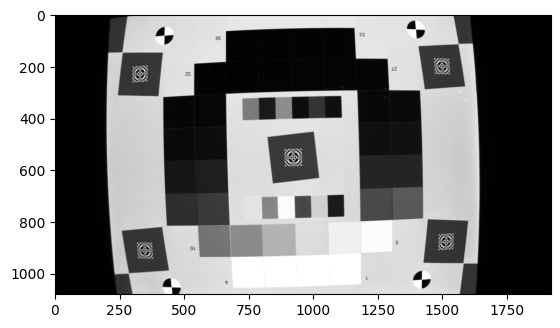

In [19]:
rawimg = np.fromfile(raw_path, dtype='uint16', sep='')
rawimg = rawimg.reshape([raw_h, raw_w])
print(50*'-' + '\nLoading RAW Image Done......')
plt.imshow(rawimg, vmin = 0, vmax=2**10-1, cmap='gray')
plt.show()

# Raw Domain
10-bit

## dead pixel correction

In [20]:
dpc_thres, dpc_mode, dpc_clip

(30, 'gradient', 1023)

--------------------------------------------------
Dead Pixel Correction Done......


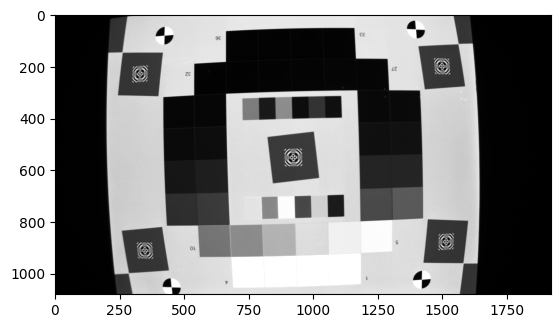

In [21]:
dpc = DPC(rawimg, dpc_thres, dpc_mode, dpc_clip)
rawimg_dpc = dpc.execute()
print(50*'-' + '\nDead Pixel Correction Done......')
plt.imshow(rawimg_dpc, cmap='gray')
plt.show()

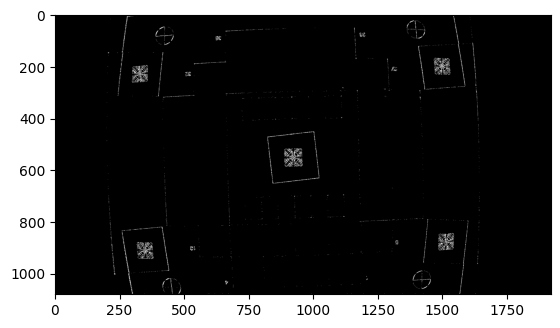

In [22]:
dpc_pos = rawimg_dpc.astype(np.int32)-rawimg.astype(np.int32)
dpc_pos[dpc_pos != 0] = 1
plt.imshow(dpc_pos, cmap='gray')

## black level compensation

In [23]:
parameter = [bl_r, bl_gr, bl_gb, bl_b, alpha, beta]
parameter, bayer_pattern, blc_clip

([0, 0, 0, 0, 0, 0], 'rggb', 1023)

--------------------------------------------------
Black Level Compensation Done......


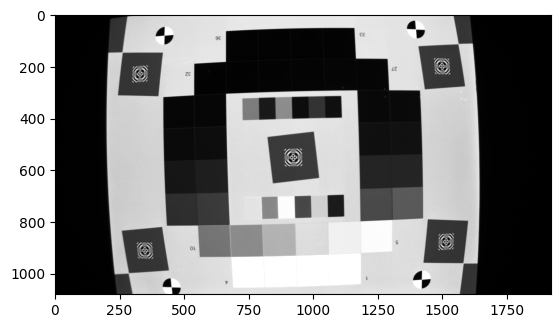

In [24]:
blc = BLC(rawimg_dpc, parameter, bayer_pattern, blc_clip)
rawimg_blc = blc.execute()
print(50*'-' + '\nBlack Level Compensation Done......')
plt.imshow(rawimg_blc, cmap='gray')
plt.show()

In [25]:
type(rawimg_blc)

numpy.ndarray

## lens shading correction

## anti-aliasing filter
a simple low-pass filter are applied here

--------------------------------------------------
Anti-aliasing Filtering Done......


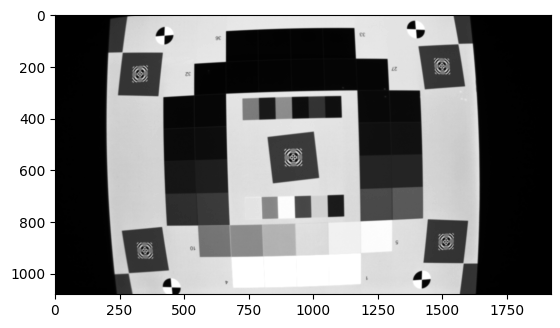

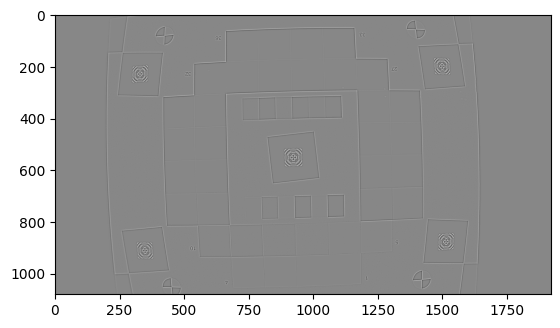

In [26]:
aaf = AAF(rawimg_blc)
rawimg_aaf = aaf.execute()
print(50*'-' + '\nAnti-aliasing Filtering Done......')
plt.imshow(rawimg_aaf, cmap='gray')
plt.show()

rawimg_diff = rawimg_blc.astype(np.int32) - rawimg_aaf.astype(np.int32)
plt.imshow(rawimg_diff, cmap='gray')
plt.show()

## white balance gain control

In [27]:
parameter = [r_gain, gr_gain, gb_gain, b_gain]
parameter

[1.5, 1.0, 1.0, 1.1]

--------------------------------------------------
White Balance Gain Done......


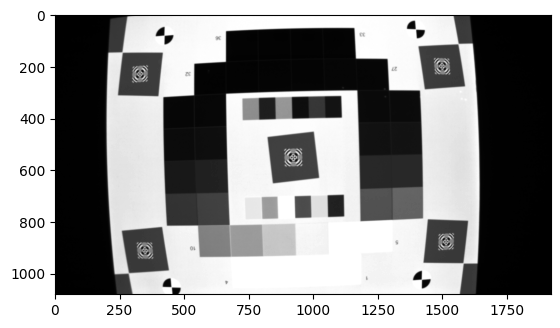

In [28]:
awb = WBGC(rawimg_aaf, parameter, bayer_pattern, awb_clip)
rawimg_awb = awb.execute()
print(50*'-' + '\nWhite Balance Gain Done......')
plt.imshow(rawimg_awb, cmap='gray')
plt.show()

## chroma noise filtering
don't understand the algorithm yet

--------------------------------------------------
Chroma Noise Filtering Done......


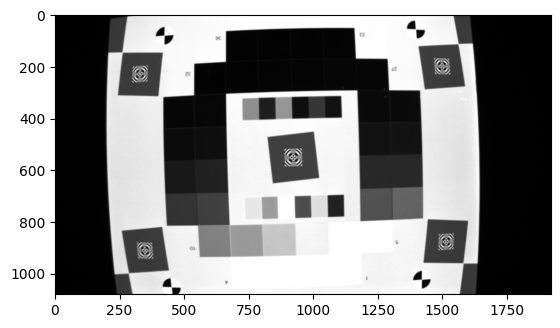

In [29]:
cnf = CNF(rawimg_awb, bayer_pattern, 0, parameter, 1023)
rawimg_cnf = cnf.execute()
print(50*'-' + '\nChroma Noise Filtering Done......')
plt.imshow(rawimg_cnf/4, cmap='gray')
plt.show()

## color filter array interpolation (demosaicing)

In [30]:
cfa_mode, cfa_clip

('malvar', 1023)

--------------------------------------------------
Demosaicing Done......


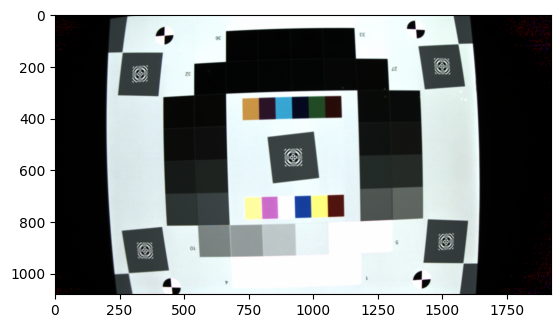

In [31]:
cfa = CFA(rawimg_cnf, cfa_mode, bayer_pattern, cfa_clip)
rgbimg_cfa = cfa.execute()
print(50*'-' + '\nDemosaicing Done......')
plt.imshow((rgbimg_cfa.astype(float)/cfa_clip))
plt.show()

# RGB Domain
10-bit

## color correction matrix

--------------------------------------------------
Color Correction Done......


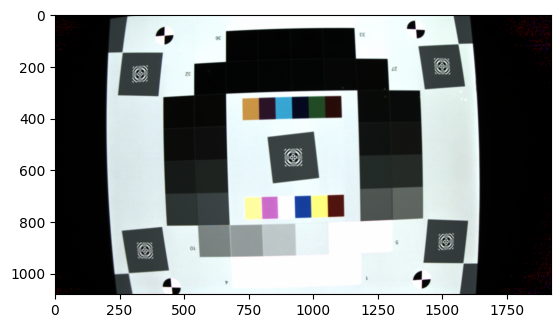

In [32]:
c_c_m = CCM(rgbimg_cfa, ccm)
rgbimg_ccm = c_c_m.execute()
print(50*'-' + '\nColor Correction Done......')
plt.imshow(rgbimg_ccm.astype(float)/cfa_clip)
plt.show()

## gamma correction

In [19]:
# look up table
bw = 10
gamma = 0.5
mode = 'rgb'

maxval = pow(2,bw)
ind = range(maxval)
val = [round(pow(float(i)/maxval, gamma) * maxval) for i in ind]
lut = dict(zip(ind, val))

--------------------------------------------------
Gamma Correction Done......


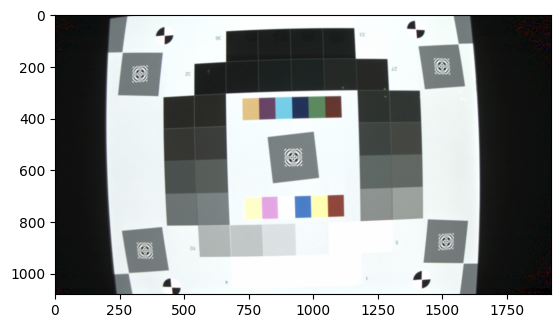

In [20]:
#print(ind, val, lut)""
gc = GC(rgbimg_ccm, lut, mode)
rgbimg_gc = gc.execute()
print(50*'-' + '\nGamma Correction Done......')
plt.imshow( rgbimg_gc.astype(float)/ (maxval-1))
plt.show()

## color space conversion

In [21]:
csc, csc_offset

(array([[ 0.257,  0.504,  0.098],
        [-0.148, -0.291,  0.439],
        [ 0.439, -0.368, -0.071]]),
 array([ 16., 128., 128.]))

--------------------------------------------------
Color Space Conversion Done......


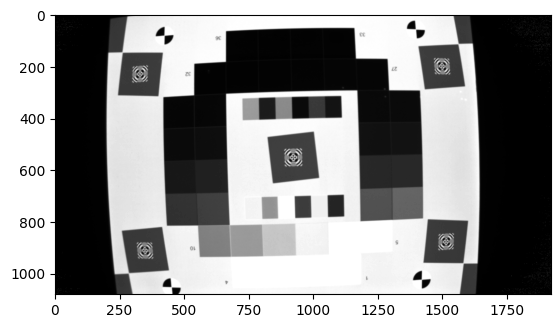

In [22]:
c_s_c = CSC(rgbimg_ccm.astype(float)/1024., csc, csc_offset)
yuvimg_csc = c_s_c.execute()
print(50*'-' + '\nColor Space Conversion Done......')
# plt.imshow(yuvimg_csc[:,:,0], cmap='gray')
plt.imshow(yuvimg_csc[:,:,0], cmap='gray')
plt.show()

# YUV Domain
16 bit (8-bit * 3 channel)

## Luma (Y)

### non-local means 
(skipped)

--------------------------------------------------
Non Local Means Denoising Done......


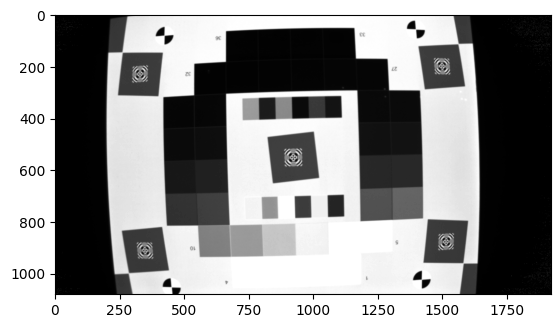

In [23]:
# nlm = NLM(yuvimg_csc[:,:,0], 1, 4, nlm_h, nlm_clip)
# yuvimg_nlm = nlm.execute()
yuvimg_nlm = yuvimg_csc[:,:,0].copy()
print(50*'-' + '\nNon Local Means Denoising Done......')
plt.imshow(yuvimg_nlm, cmap='gray')
plt.show()

### bilateral filter
very bad algorithm

In [24]:
bnf_dw, bnf_rw, bnf_rthres, bnf_clip

(array([[   8.,   12.,   32.,   12.,    8.],
        [  12.,   64.,  128.,   64.,   12.],
        [  32.,  128., 1024.,  128.,   32.],
        [  12.,   64.,  128.,   64.,   12.],
        [   8.,   12.,   32.,   12.,    8.]]),
 [0, 8, 16, 32],
 [128, 32, 8],
 255)

--------------------------------------------------
Bilateral Filtering Done......


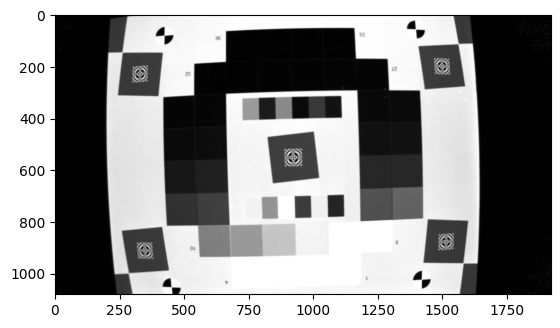

In [25]:
bnf = BNF(yuvimg_nlm, bnf_dw, bnf_rw, bnf_rthres, bnf_clip)
yuvimg_bnf = bnf.execute()
print(50*'-' + '\nBilateral Filtering Done......')
plt.imshow(yuvimg_bnf, cmap='gray')
plt.show()

### edge enhancement

In [26]:
edge_filter, ee_gain, ee_thres, ee_emclip

(array([[-1.,  0., -1.,  0., -1.],
        [-1.,  0.,  8.,  0., -1.],
        [-1.,  0., -1.,  0., -1.]]),
 [32, 128],
 [32, 64],
 [-64, 64])

--------------------------------------------------
Edge Enhancement Done......


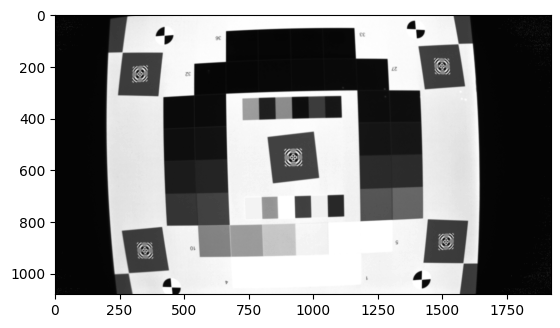

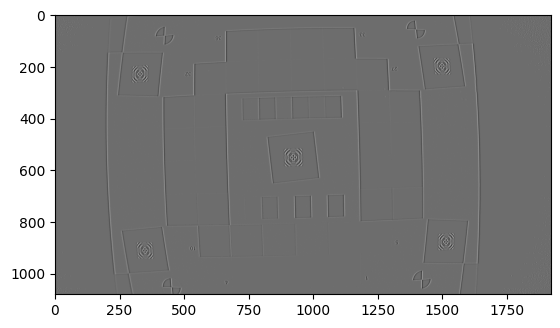

In [27]:
ee = EE(yuvimg_bnf, edge_filter, ee_gain, ee_thres, ee_emclip)
yuvimg_ee, yuvimg_edgemap = ee.execute()
print(50*'-' + '\nEdge Enhancement Done......')
plt.imshow(yuvimg_ee, cmap='gray')
plt.show()
plt.imshow(yuvimg_edgemap, cmap='gray')
plt.show()

### brighyness/contrast control

In [28]:
contrast = contrast / pow(2,5)    #[-32,128]
brightness, contrast, bcc_clip

(10, 0.3125, 255)

--------------------------------------------------
Brightness/Contrast Adjustment Done......


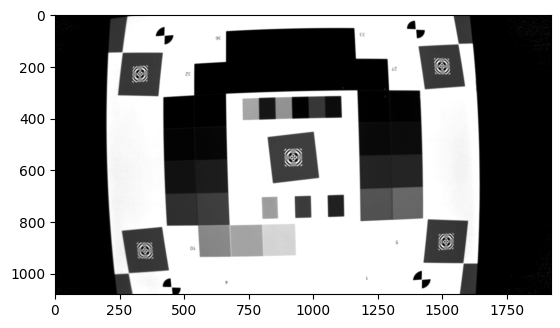

In [29]:

bcc = BCC(yuvimg_ee, brightness, contrast, bcc_clip)
yuvimg_bcc = bcc.execute()
print(50*'-' + '\nBrightness/Contrast Adjustment Done......')
plt.imshow(yuvimg_bcc, cmap='gray')
plt.show()

## Chroma (UV)

### false color suppresion
(skipped)

In [30]:
yuvimg_edgemap, fcs_edge, fcs_gain, fcs_intercept, fcs_slope

(array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [-14,   0,  45, ...,   0,   0,   0],
        [-32,   0, -25, ...,   0,   0,   0],
        [ 38,   0,  46, ...,   0,   0,   0]], dtype=int16),
 [32, 32],
 32,
 2,
 3)

--------------------------------------------------
False Color Suppresion Done......


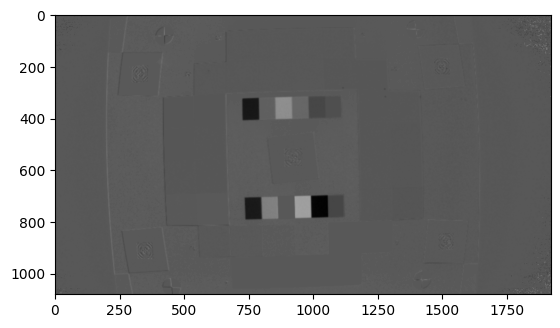

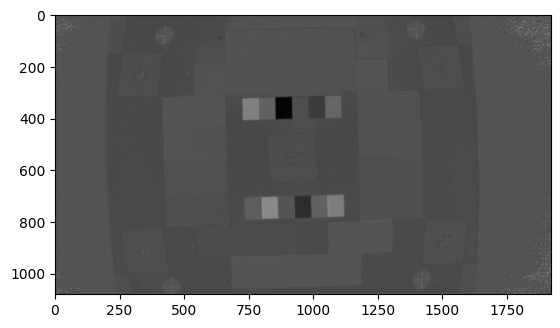

In [31]:
# fcs = FCS(yuvimg_csc[:,:,1:3], yuvimg_edgemap, fcs_edge, fcs_gain, fcs_intercept, fcs_slope)
# yuvimg_fcs = fcs.execute()
yuvimg_fcs = yuvimg_csc[:,:,1:3].copy()
print(50*'-' + '\nFalse Color Suppresion Done......')
plt.imshow(yuvimg_fcs[:,:,0], cmap='gray')
plt.show()
plt.imshow(yuvimg_fcs[:,:,1], cmap='gray')
plt.show()

### hue/saturation control

In [34]:
hue, saturation, hsc_clip

(128, 256, 255)

--------------------------------------------------
Hue/Saturation Adjustment Done......


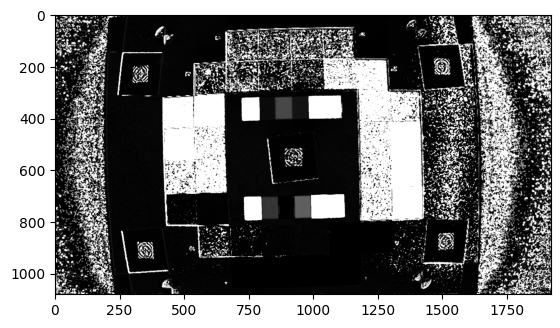

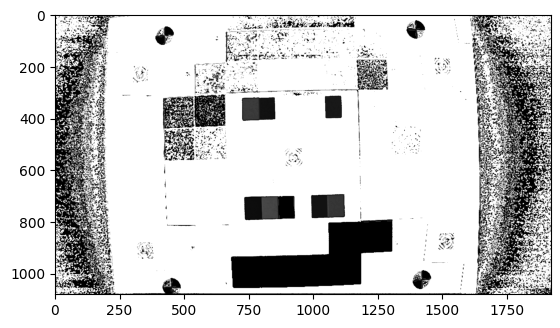

In [37]:
hsc = HSC(yuvimg_fcs, hue, saturation, hsc_clip)
yuvimg_hsc = hsc.execute()
print(50*'-' + '\nHue/Saturation Adjustment Done......')
# plt.imshow(yuvimg_hsc)
plt.imshow(yuvimg_hsc[:,:,0], cmap='gray')
plt.show()
plt.imshow(yuvimg_hsc[:,:,1], cmap='gray')
plt.show()

## Final Combination

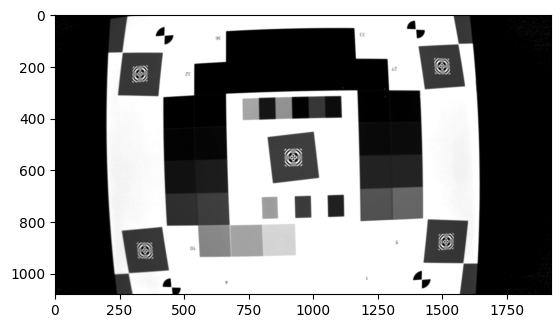

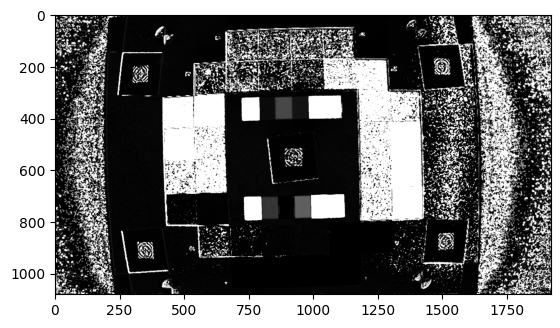

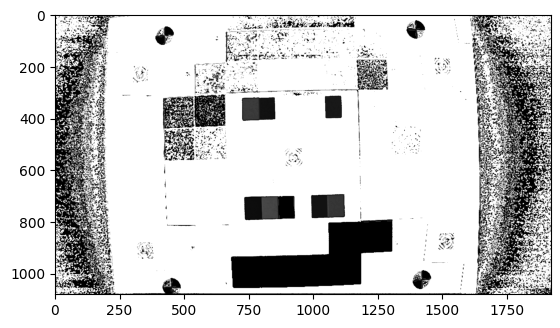

In [39]:
yuvimg_out = np.empty((raw_h, raw_w, 3), dtype=np.uint8)
yuvimg_out[:,:,0] = yuvimg_bcc
yuvimg_out[:,:,1:3] = yuvimg_hsc

plt.imshow(yuvimg_out[:,:,0], cmap='gray')
plt.show()
plt.imshow(yuvimg_out[:,:,1], cmap='gray')
plt.show()
plt.imshow(yuvimg_out[:,:,2], cmap='gray')
plt.show()